#프로젝트 목표
### ★ 다음 분기에 어떤 게임을 설계해야 할까? 

#####아래 3가지는 반드시 포함하도록 분석을 시행 해 볼 것입니다.

1. 지역에 따라 선호하는 게임 장르
2. 연도별 게임 트렌드
3. 출고량 높은 게임에 대한 분석 및 시각화 프로세스




##1. DataSet 불러오기

1.   raw data 불러오기
2.   기본 데이터를 data에 저장
3.   data를 바탕으로 세 가지 분석 목적에 따라 데이터를 각자 정제하여 분석 
> 기본 단위 맞추기



참고 ) 10^3 thousand K ,
10^4 millions M








In [1]:
raw_data = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(raw_data, index_col = 0)

data.head(11) # 기본 데이터

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


단위가 통일이 되지 않음을 알 수 있다.

데이터는 백만(M)이 기준, 몇몇개는 K단위로 표기 돼 있고 또 몇몇개는 M이 표시가 돼 있다

단위를 백만으로 통일, 데이터 타입 : float 으로 저장

In [3]:
# 판매량 단위 M 제거
data["NA_Sales"] = data["NA_Sales"].str.replace(pat=r'M', repl=r'', regex=True)
data["EU_Sales"] = data["EU_Sales"].str.replace(pat=r'M', repl=r'', regex=True)
data["JP_Sales"] = data["JP_Sales"].str.replace(pat=r'M', repl=r'', regex=True)
data["Other_Sales"] = data["Other_Sales"].str.replace(pat=r'M', repl=r'', regex=True)

data.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
data["NA_Sales"] = data["NA_Sales"].str.replace(pat=r'K', repl=r'E-3', regex=True).astype(float)
data["EU_Sales"] = data["EU_Sales"].str.replace(pat=r'K', repl=r'E-3', regex=True).astype(float)
data["JP_Sales"] = data["JP_Sales"].str.replace(pat=r'K', repl=r'E-3', regex=True).astype(float)
data["Other_Sales"] = data["Other_Sales"].str.replace(pat=r'K', repl=r'E-3', regex=True).astype(float)

data.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01



기본 전처리 완료 (단위 통일 - 백만 기준으로)
---

1. 지역에 따라 선호하는 게임 장르 분석

In [5]:
# 장르, 나라 제외 
sales_genre = data.drop(['Name', 'Platform', 'Year', 'Publisher'], axis = 1)

sales_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16594,Platform,0.15,0.04,0.00,0.01
16595,Action,0.01,0.00,0.00,0.00
16596,Sports,0.44,0.19,0.03,0.13
16597,Action,0.05,0.05,0.25,0.03


In [6]:
sales_genre['Genre'].value_counts() # Genre 종류는 총 12가지임을 확인

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [7]:
#장르를 기준으로 데이터 더하기
grouped = sales_genre.groupby('Genre')
sales_genre_sum = grouped.sum()

sales_genre_sum['Genre'] = sales_genre_sum.index

sales_genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre
Genre,,,,,
Action,874.81,522.16,157.90,186.45,Action
Adventure,105.66,64.05,51.95,16.81,Adventure
Fighting,223.20,101.22,87.34,36.64,Fighting
Misc,408.05,212.36,105.27,74.04,Misc
Platform,446.44,201.61,130.65,51.53,Platform
Puzzle,123.35,50.73,56.87,12.52,Puzzle
Racing,357.19,237.10,56.40,77.10,Racing
Role-Playing,319.54,183.58,344.95,56.96,Role-Playing
Shooter,581.92,313.05,38.28,102.65,Shooter


In [8]:
sales_genre_sum.describe()

# 합계의 표준편차 크기 비교 NA > EU > JP > Other

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,12.000000,12.000000,12.000000,12.00000
mean,364.361667,201.750833,106.511667,66.01750
std,249.328797,145.049431,84.731607,53.39806
min,68.700000,45.320000,38.280000,11.36000
25%,168.057500,91.927500,55.287500,27.81250
50%,338.365000,192.595000,75.520000,54.24500
75%,480.310000,256.087500,131.830000,83.48750
max,874.810000,522.160000,344.950000,186.45000


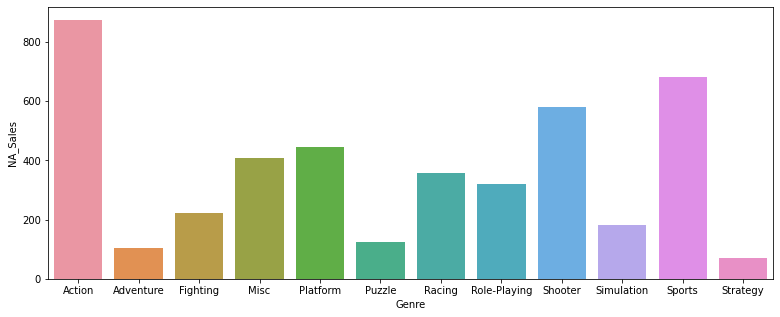

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(13, 5))
sns.barplot(x = 'Genre', y="NA_Sales", data = sales_genre_sum);

#아래 그래프를 통해 Action , Sports, Shooter가 TOP3 항목임을 알 수 있다.
# 그 이후로 Platform, Misc, Racing, Role-Playing 순으로 구성되어 있으나 TOP3 항목과 꽤 큰 차이를 보이고 있다
# 나머지 장르는 미미한 수치를 보이고 있다.

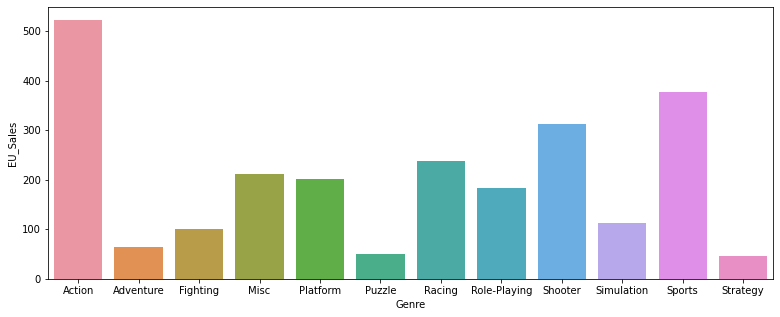

In [10]:
plt.figure(figsize=(13, 5))
sns.barplot(x = 'Genre', y="EU_Sales", data = sales_genre_sum);

# Action, Sportrs, Shooter 순으로 TOP3
# 그 뒤로 Racing, Misc, Platform, Role-Playing 이 뒤따르나 차이가 크진 않다 (엇비슷하다)
# 나머지 항목들은 미미하다.
# TOP1과 나머지 과목들의 출고량 차이가 꽤 난다

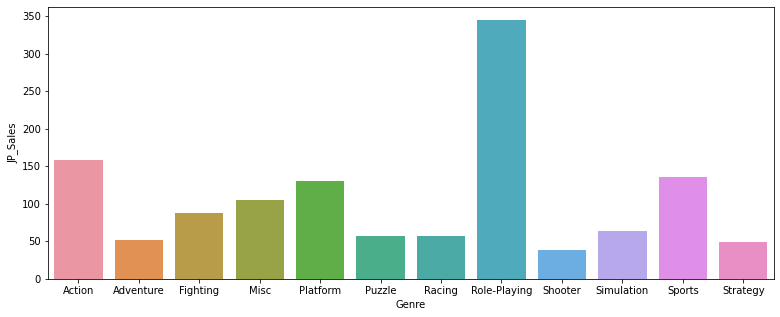

In [11]:
plt.figure(figsize=(13, 5))
sns.barplot(x = 'Genre', y="JP_Sales", data = sales_genre_sum);

# Role-playing이 압도적으로 출고량이 높다
# 그 뒤는 비슷하다, 그 중에서도 Action, Sports, Platform 이 높다
# 나머지 항목은 다른 나라에 비해서도 판매량이 현저히 낮은 것을 알 수 있다

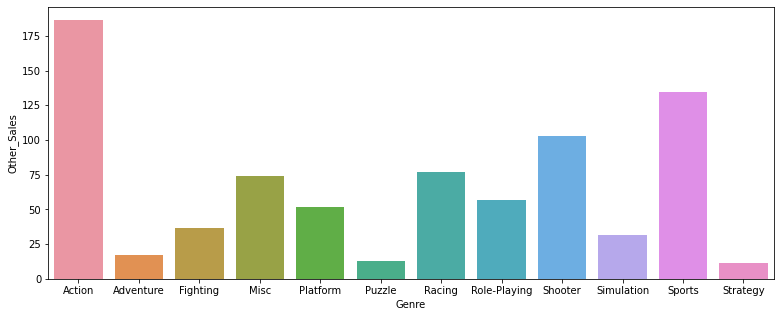

In [12]:
plt.figure(figsize=(13, 5))
sns.barplot(x = 'Genre', y="Other_Sales", data = sales_genre_sum);

#Action, Sports, Shooter TOP3
# Misc와 Racing이 비슷하게 뒤따른다.
# 나머지의 판매량은 낮은 수치를 띈다

판매량의 절대적인 값은 NA 지역이 가장 많다.
일본을 제외한 나머지 지역들은 똑같이 Action, Sports, Shooter 장르 순으로 판매량이 많다.
일본은 특히 Role-Playing 장르의 판매량이 다른 장르들에 비해 압도적으로 높다.
이를 통해 일본 시장은 Role-Playing 장르의 수요가 다른 나라에 비해서 특이하게 높다는 것을 알 수 있다. (그래도 그 후를 따르는 순위는 똑같이 , Action, Sports임을 알 수 있다)

###2. 연도별 게임 트렌드 분석

In [13]:
data.head()

data.info() # Year에 결측치 값이 있음을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [14]:
#Year 에 있는 결측치 모두 제거
clean_year = data.dropna(subset = ['Year'], axis=0)

clean_year.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [15]:
clean_year.info() # 결측치가 제거되었음을 확인!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16291 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  float64
 7   JP_Sales     16327 non-null  float64
 8   Other_Sales  16327 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [16]:
clean_year['Year'].value_counts()

#Year은 모두 정수로 변환, 4자리 수로 모두 통일해주기

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
12.0         2
97.0         2
94.0         1
2020.0       1
86.0         1
Name: Year, Length: 62, dtype: int64

In [17]:
clean_year = clean_year.astype({'Year': 'int'})

clean_year.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
9,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [18]:
set(clean_year['Year'])

#Year가 통일되지 않음을 확인 가능
#추론을 통해 Year의 값을 4자리로 통일
#정확한 추론이 불가능한 행은 제거
# ex. 한 자리 수로 표기된 셀 > 제거
# ex2. 11 > 2011, 98 > 1998 ..

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 86,
 94,
 95,
 96,
 97,
 98,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020}

In [19]:
from pandas import DataFrame, Series

final_year = clean_year.replace({10: 2010, 11: 2011, 12: 2012, 13: 2013, 14: 2014, 15: 2015, 16: 2016,
                                 86 : 1986, 94 : 1994, 95 : 1995, 96 : 1996, 97 : 1997, 98 : 1998})

final_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [20]:
set(final_year['Year'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020}

In [21]:
# Year 컬럼에 한자리수 셀이 있는 행은 다 제거 (조건식 이용)
indexNames = final_year[(final_year['Year'] < 10)].index
final_year.drop(indexNames , inplace=True)

In [22]:
set(final_year['Year'])
#확인 결과 다 제거되었음을 알 수 있다

{1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020}

In [23]:
final_year.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [24]:
# Sales의 합 구하기
final_year['Sales_Sum'] = final_year['NA_Sales'] + final_year['EU_Sales'] + final_year['JP_Sales'] + final_year['Other_Sales']

final_year.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


In [25]:
#필요한 데이터만 추출
y_g_sum = final_year[['Year','Genre', 'Sales_Sum']]

y_g_sum.head()

,Year,Genre,Sales_Sum
1,2008,Action,0.04
2,2009,Action,0.18
3,2010,Adventure,0.02
4,2010,Misc,0.04
5,2010,Platform,0.25


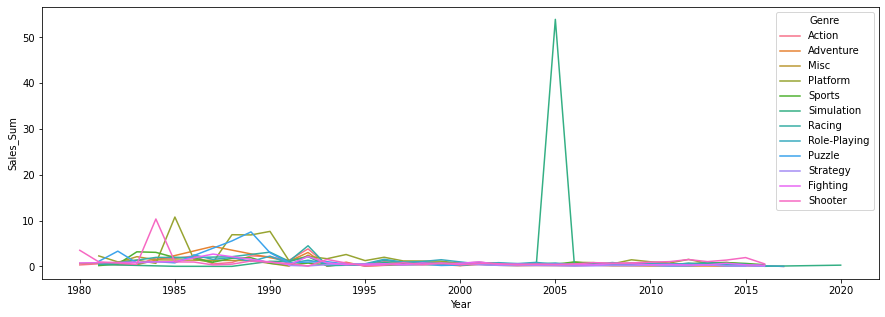

In [26]:
plt.figure(figsize = (15,5))
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data= y_g_sum, err_style = None);

#2005년 즈음에 Simulation 장르의 판매량이 갑자기 폭발적임을 확인.. 이상치로 제거해도 될 것 같다.
#왜냐하면 그 전후로는 판매량이 유의미하지 않다

In [27]:
# 정규분포를 이용하여 표준화

normalization_df = (y_g_sum['Sales_Sum'] - y_g_sum['Sales_Sum'].mean())/y_g_sum['Sales_Sum'].std()
normalization_df = pd.DataFrame(normalization_df)

normalization_df.rename(columns = {'Sales_Sum' : 'Sales_Sum_norm'}, inplace = True)
normalization_df.head()

,Sales_Sum_norm
1,-0.039111
2,-0.030330
3,-0.040365
4,-0.039111
5,-0.025939


In [28]:
g = pd.concat([y_g_sum, normalization_df], axis = 1)

g.head()

,Year,Genre,Sales_Sum,Sales_Sum_norm
1,2008,Action,0.04,-0.039111
2,2009,Action,0.18,-0.030330
3,2010,Adventure,0.02,-0.040365
4,2010,Misc,0.04,-0.039111
5,2010,Platform,0.25,-0.025939


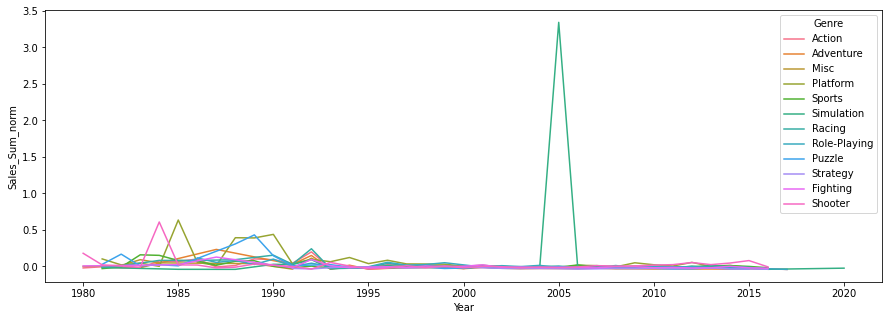

In [29]:
plt.figure(figsize = (15,5))
sns.lineplot(x='Year',
                  y='Sales_Sum_norm', 
                  hue='Genre',
                  data=g, err_style = None);


In [30]:
# Genre가 Action인 것만 추출해서 새롭게 저장
is_Action = g['Genre'] == 'Action'

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
action = g[is_Action]

# 결과를 출력합니다.
action

,Year,Genre,Sales_Sum,Sales_Sum_norm
1,2008,Action,0.04,-0.039111
2,2009,Action,0.18,-0.030330
8,2005,Action,0.19,-0.029703
10,2011,Action,0.08,-0.036602
16,2009,Action,0.36,-0.019040
...,...,...,...,...
16576,2015,Action,1.08,0.026119
16582,2014,Action,0.27,-0.024685
16584,2009,Action,1.43,0.048071
16595,2005,Action,0.01,-0.040992


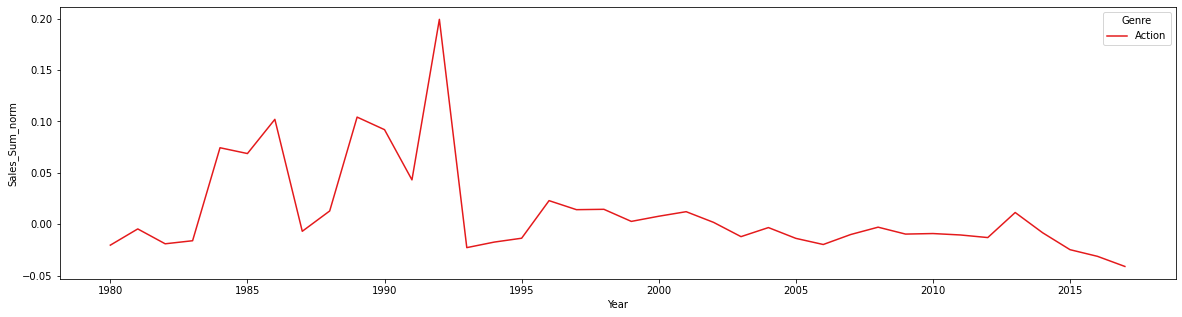

In [31]:
plt.figure(figsize = (20,5))
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=action, err_style=None, palette= 'Set1');

In [32]:
# Genre가 Adventure인 것만 추출해서 새롭게 저장
is_Adventure = g['Genre'] == 'Adventure'

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
adventure = g[is_Adventure]

#Misc
is_Misc = g['Genre'] == 'Misc'

misc = g[is_Misc]

#Platform
is_Platform = g['Genre'] == 'Platform'

platform = g[is_Platform]

#Sports
is_Sports = g['Genre'] == 'Sports'

sports = g[is_Sports]

#Simulation
is_Simulation = g['Genre'] == 'Simulation'

simulation = g[is_Simulation]

#Racing
is_Racing = g['Genre'] == 'Racing'

racing = g[is_Racing]

#Role-Playing
is_Role_Playing = g['Genre'] == 'Role-Playing'

role_playing = g[is_Role_Playing]

#Puzzle
is_Puzzle = g['Genre'] == 'Puzzle'

puzzle = g[is_Puzzle]

#Strategy
is_Strategy = g['Genre'] == 'Strategy'

strategy = g[is_Strategy]

#Fighting
is_Fighting = g['Genre'] == 'Fighting'

fighting = g[is_Fighting]

#Shooter
is_Shooter = g['Genre'] == 'Shooter'

shooter = g[is_Shooter]

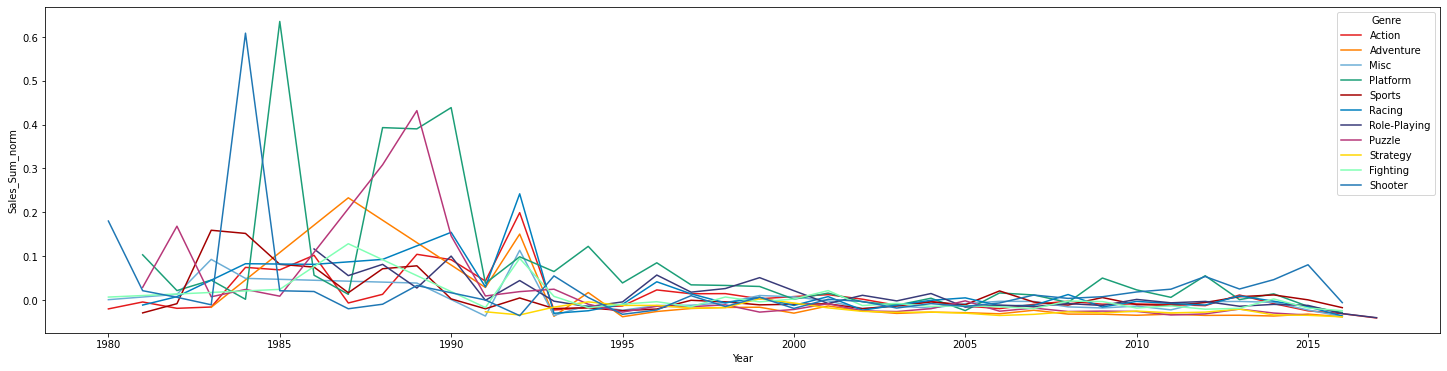

In [33]:
plt.figure(figsize = (25,6))

sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=action, err_style = None, palette= 'Set1');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=adventure, err_style = None, palette= 'autumn');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=misc, err_style = None, palette= 'Blues_r');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=platform, err_style = None, palette= 'Dark2');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=sports, err_style = None, palette= 'flag');
#sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=simulation, err_style = None, palette= 'Greens');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=racing, err_style = None, palette= 'winter');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=role_playing, err_style = None, palette= 'tab20b');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=puzzle, err_style = None, palette= 'magma');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=strategy, err_style = None, palette= 'prism');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=fighting, err_style = None, palette= 'rainbow');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=shooter, err_style = None);

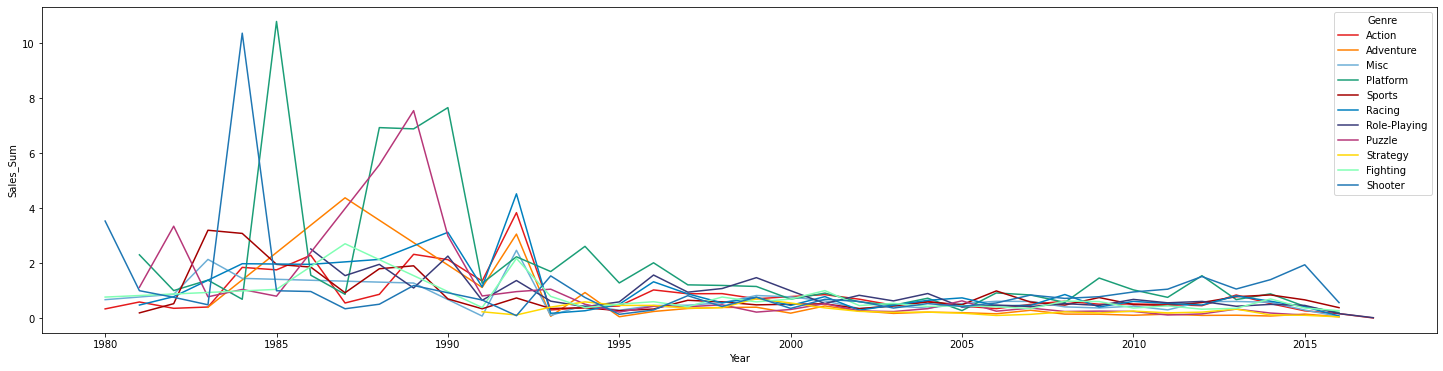

In [34]:
plt.figure(figsize = (25,6))
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=action, err_style = None, palette= 'Set1');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=adventure, err_style = None, palette= 'autumn');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=misc, err_style = None, palette= 'Blues_r' );
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=platform, err_style = None, palette= 'Dark2');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=sports, err_style = None, palette= 'flag');
#sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=simulation, err_style = None, palette= 'Greens');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=racing, err_style = None, palette= 'winter');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=role_playing, err_style = None, palette= 'tab20b');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=puzzle, err_style = None, palette= 'magma');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=strategy, err_style = None, palette= 'prism');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=fighting, err_style = None, palette= 'rainbow');
sns.lineplot(x='Year', y='Sales_Sum', hue='Genre', data=shooter, err_style = None);

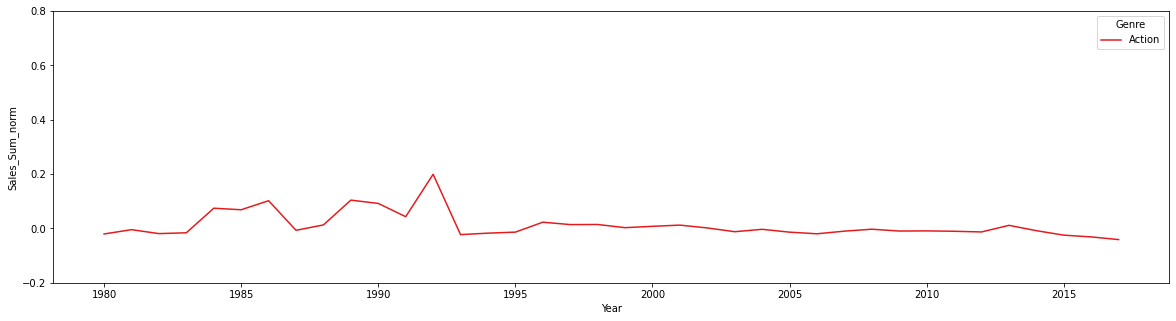

In [35]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=action, err_style=None, palette= 'Set1');

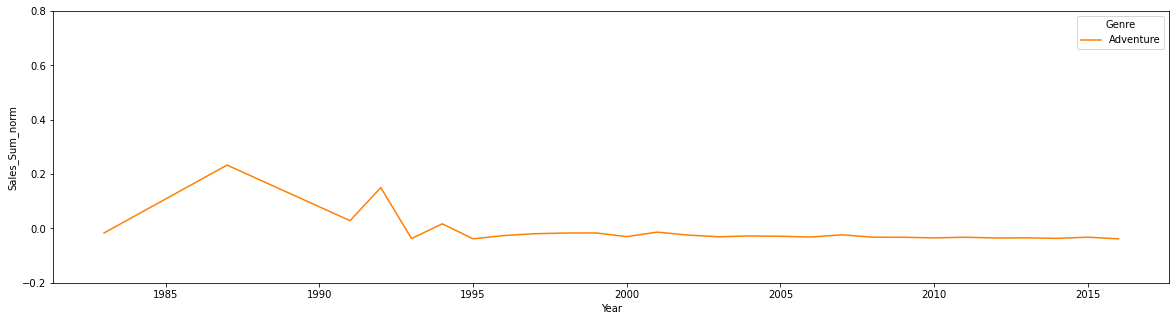

In [36]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=adventure, err_style = None, palette= 'autumn');

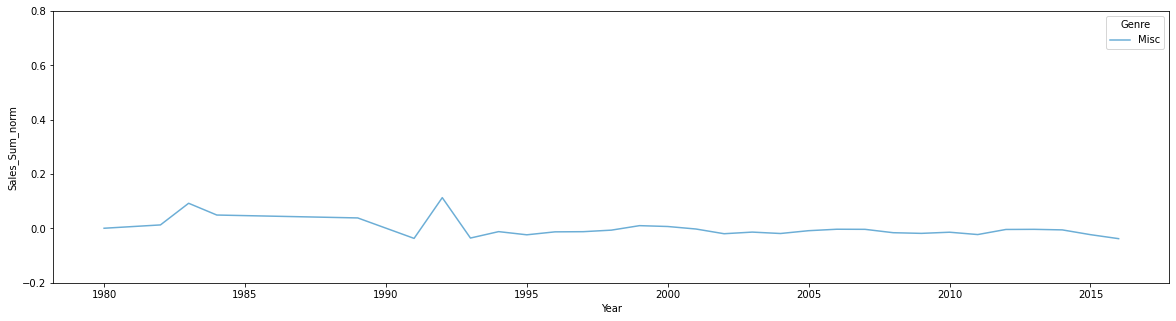

In [37]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=misc, err_style=None, palette= 'Blues_r');

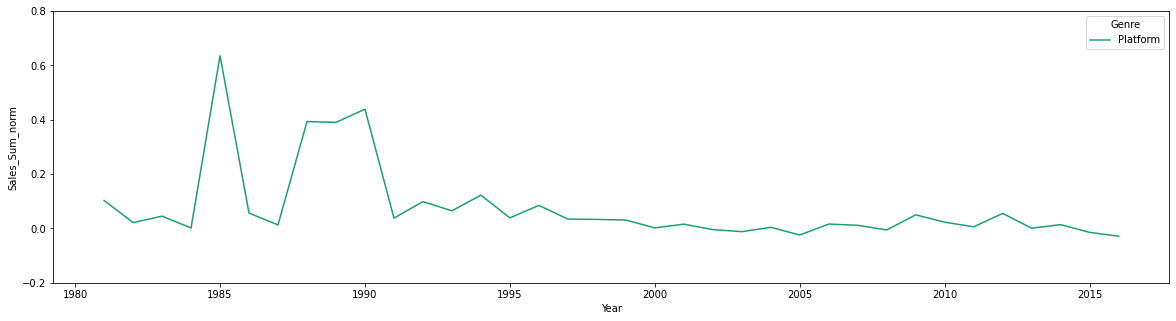

In [38]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=platform, err_style=None, palette= 'Dark2');

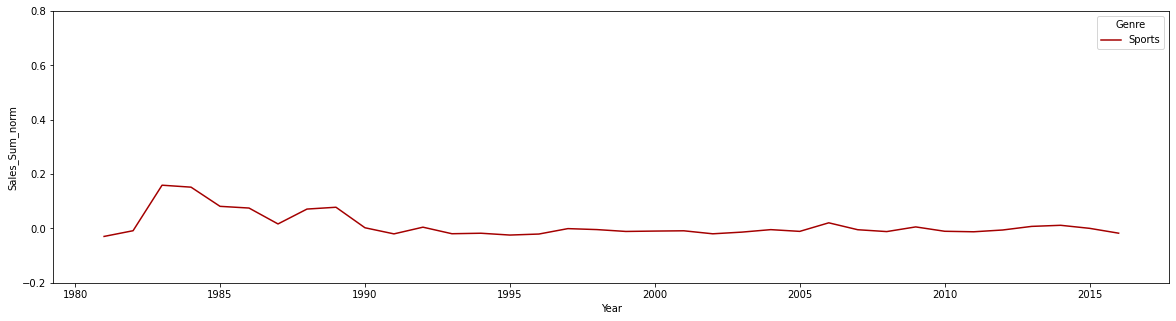

In [39]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=sports, err_style=None, palette= 'flag');

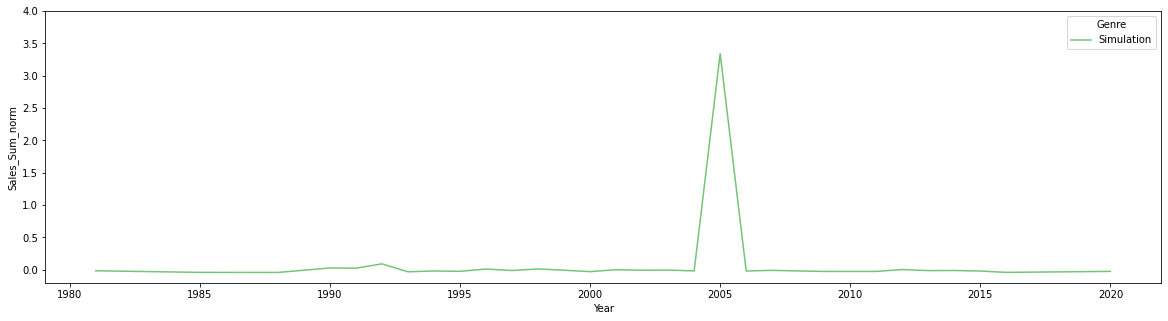

In [40]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,4.0])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=simulation, err_style=None, palette= 'Greens');

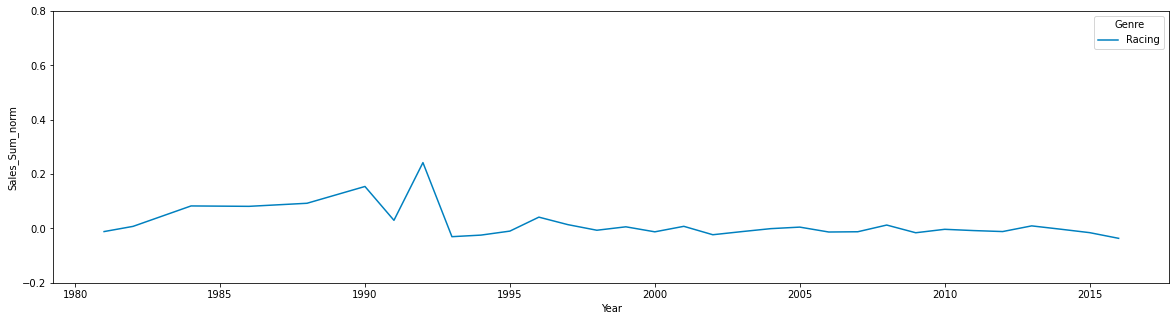

In [41]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=racing, err_style=None, palette= 'winter');

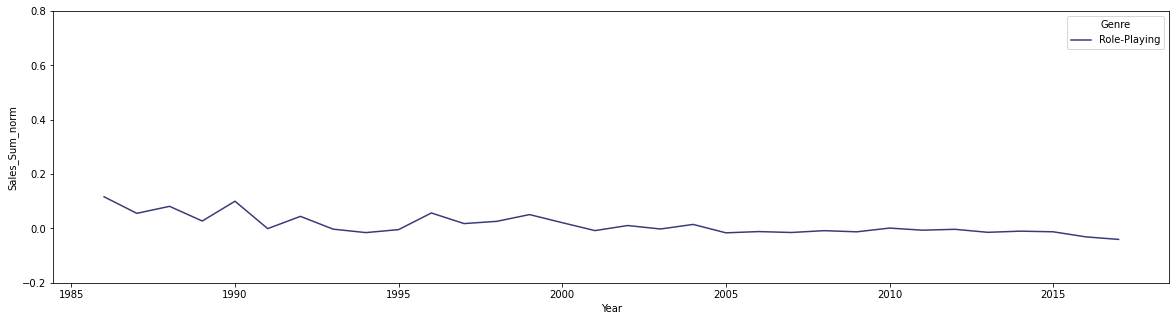

In [42]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=role_playing, err_style=None, palette= 'tab20b');

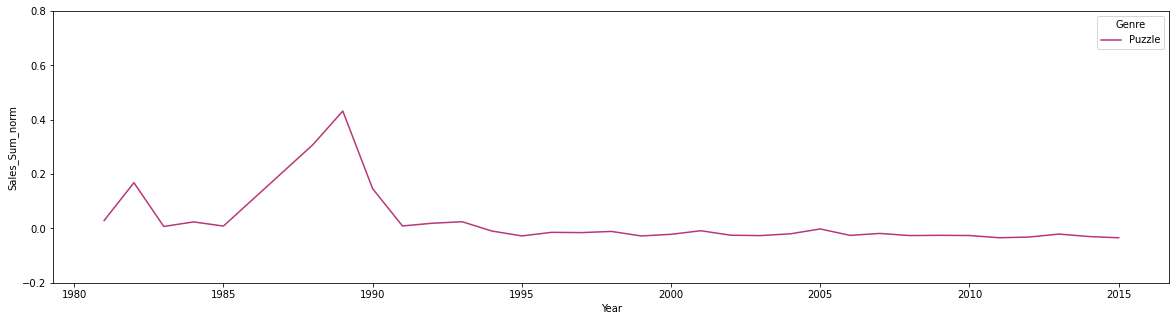

In [43]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=puzzle, err_style=None, palette= 'magma');

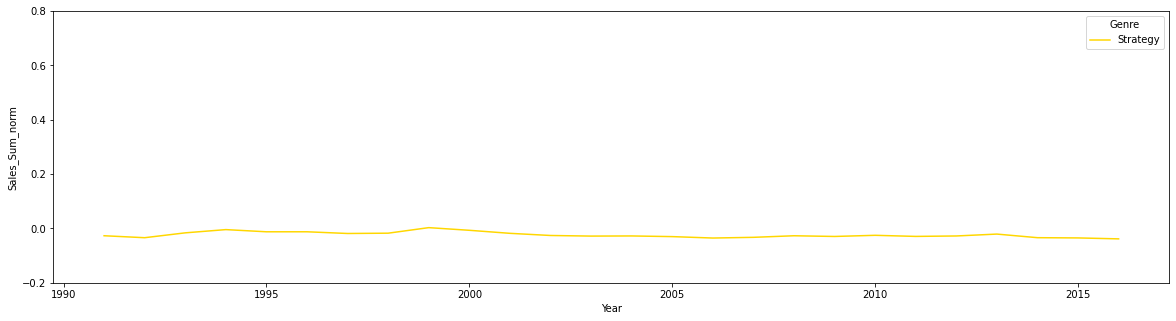

In [44]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=strategy, err_style=None, palette= 'prism');

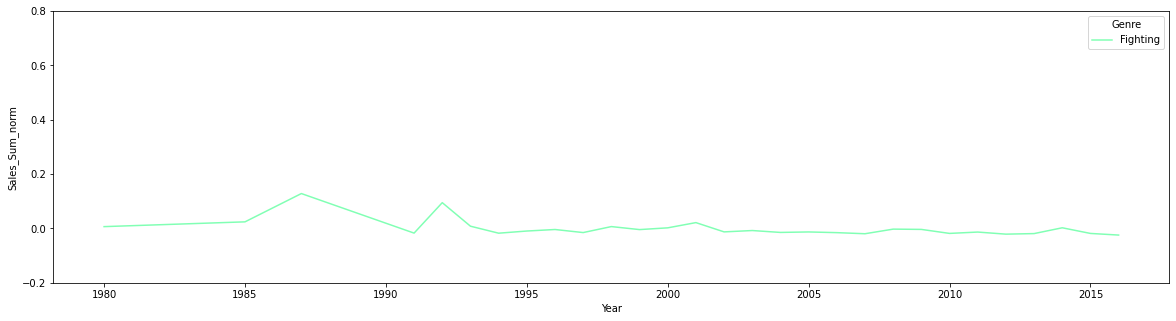

In [45]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=fighting, err_style=None, palette= 'rainbow');

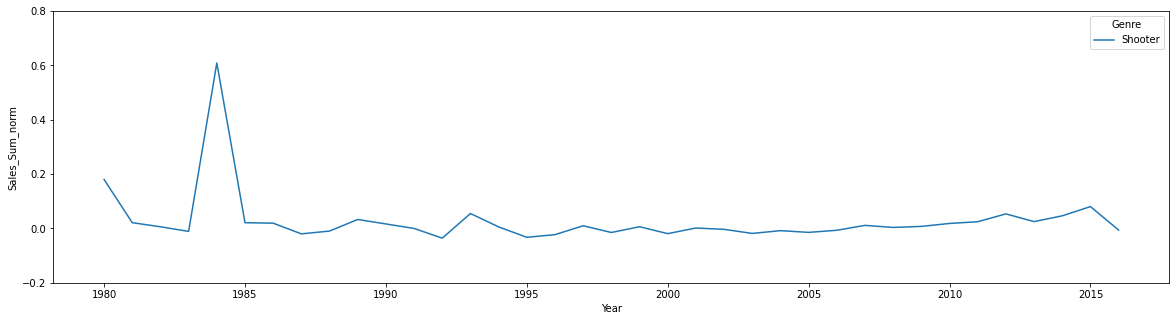

In [46]:
plt.figure(figsize = (20,5))
plt.ylim([-0.2,0.8])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=shooter, err_style=None);

데이터를 정규화해서 y축의 범위를 [-0.2, 0.8]로 설정

그래프를 살펴보면 전체적으로 모든 데이터가 1995년~2000년을 기점으로 매출량 자체가 크게 감소함을 확인할 수  있다.

게임 시장이 전체적으로 크게 감소함을 알 수 있다.

우선, 새로운 게임 출시가 목적이니 이전의 데이터를 제외, 2000년대 이후부터 다시 새롭게 데이터를 전처리 시행하였다.

In [47]:
# Year 컬럼에 2000년도 미만 셀이 있는 행은 다 제거 (조건식 이용)
indexNames = g[(g['Year'] < 2000)].index
f = g.drop(indexNames)

In [48]:
set(f['Year'])
#확인 결과 다 제거되었음을 알 수 있다

{2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020}

In [49]:
#전처리 다시ㅠㅠ
#Action
is_Action = f['Genre'] == 'Action'

action = f[is_Action]

# Adventure
is_Adventure = f['Genre'] == 'Adventure'

adventure = f[is_Adventure]

#Misc
is_Misc = f['Genre'] == 'Misc'

misc = f[is_Misc]

#Platform
is_Platform = f['Genre'] == 'Platform'

platform = f[is_Platform]

#Sports
is_Sports = f['Genre'] == 'Sports'

sports = f[is_Sports]

#Simulation
is_Simulation = f['Genre'] == 'Simulation'

simulation = f[is_Simulation]

#Racing
is_Racing = f['Genre'] == 'Racing'

racing = f[is_Racing]

#Role-Playing
is_Role_Playing = f['Genre'] == 'Role-Playing'

role_playing = f[is_Role_Playing]

#Puzzle
is_Puzzle = f['Genre'] == 'Puzzle'

puzzle = f[is_Puzzle]

#Strategy
is_Strategy = f['Genre'] == 'Strategy'

strategy = f[is_Strategy]

#Fighting
is_Fighting = f['Genre'] == 'Fighting'

fighting = f[is_Fighting]

#Shooter
is_Shooter = f['Genre'] == 'Shooter'

shooter = f[is_Shooter]

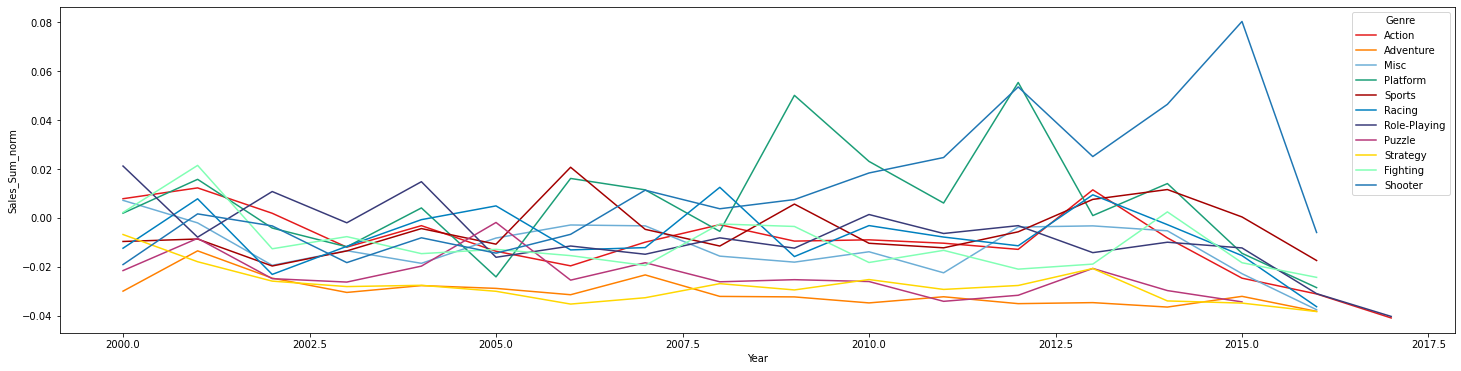

In [50]:
plt.figure(figsize = (25,6))
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=action, err_style = None, palette= 'Set1');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=adventure, err_style = None, palette= 'autumn');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=misc, err_style = None, palette= 'Blues_r' );
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=platform, err_style = None, palette= 'Dark2');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=sports, err_style = None, palette= 'flag');
#sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=simulation, err_style = None, palette= 'Greens');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=racing, err_style = None, palette= 'winter');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=role_playing, err_style = None, palette= 'tab20b');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=puzzle, err_style = None, palette= 'magma');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=strategy, err_style = None, palette= 'prism');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=fighting, err_style = None, palette= 'rainbow');
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=shooter, err_style = None);

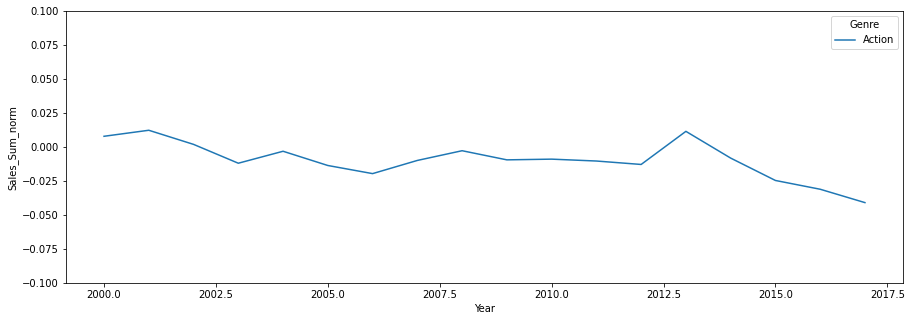

In [51]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=action, err_style=None);

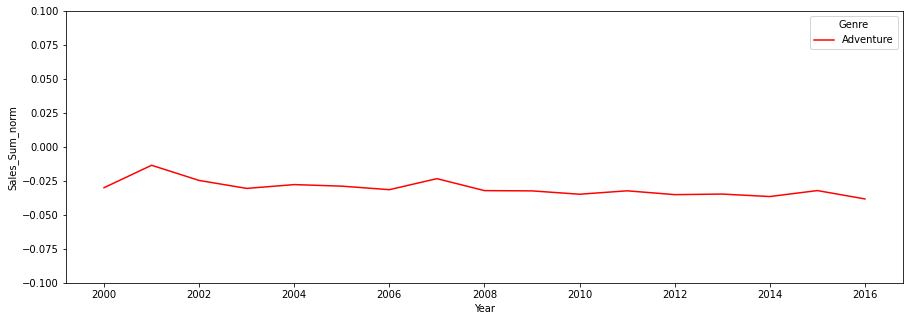

In [52]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=adventure, err_style=None, palette= 'brg');

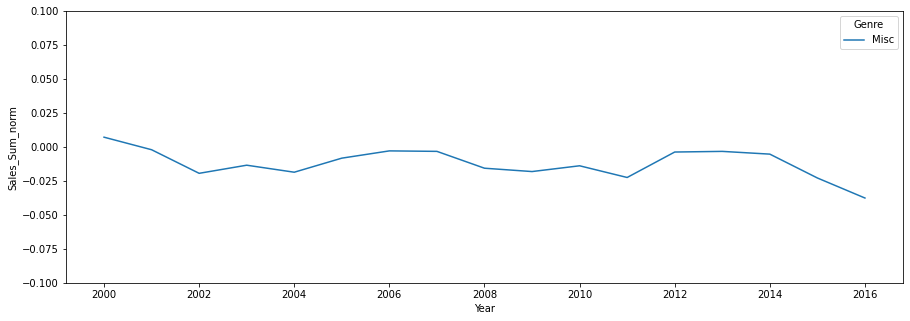

In [53]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=misc, err_style=None);

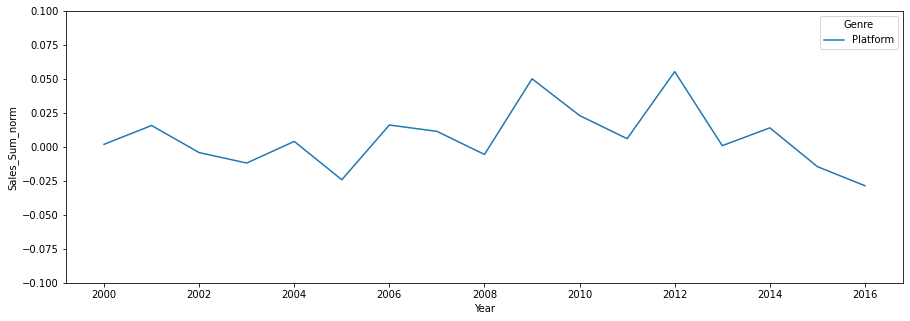

In [54]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=platform, err_style=None);

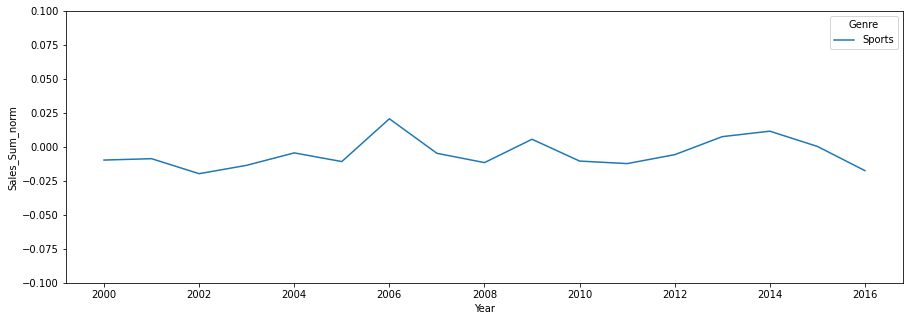

In [55]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=sports, err_style=None);

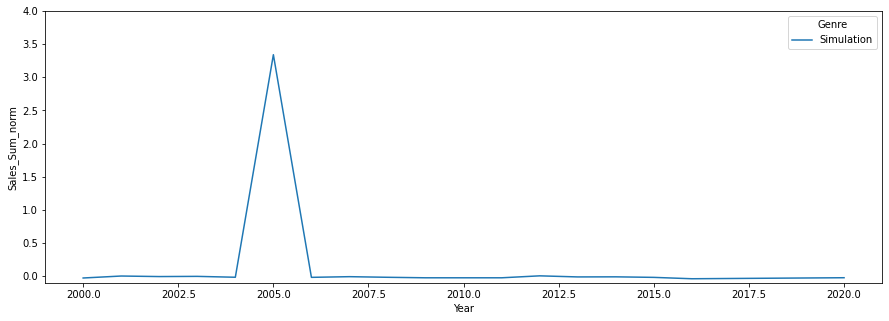

In [56]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,4])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=simulation, err_style=None);

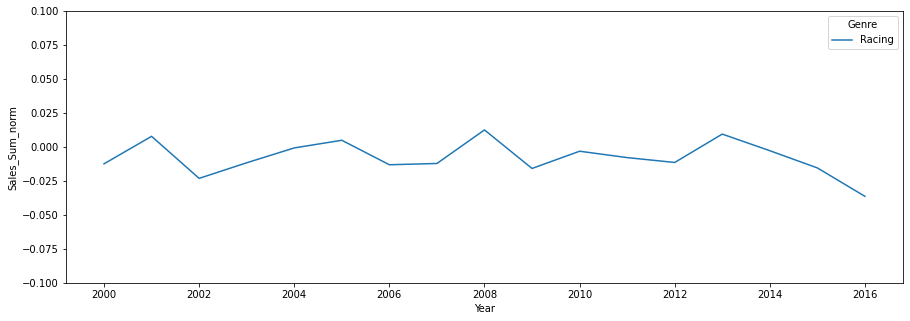

In [57]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=racing, err_style=None);

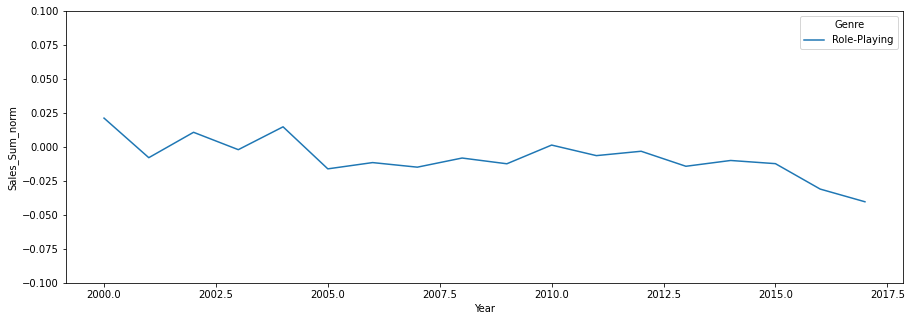

In [58]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=role_playing, err_style=None);

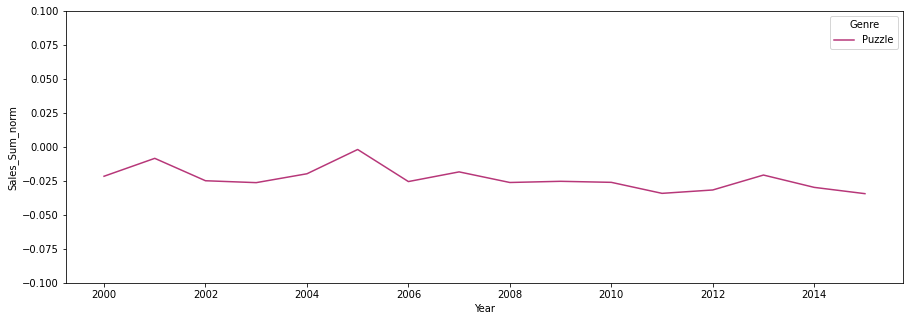

In [59]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=puzzle, err_style=None, palette= 'magma');

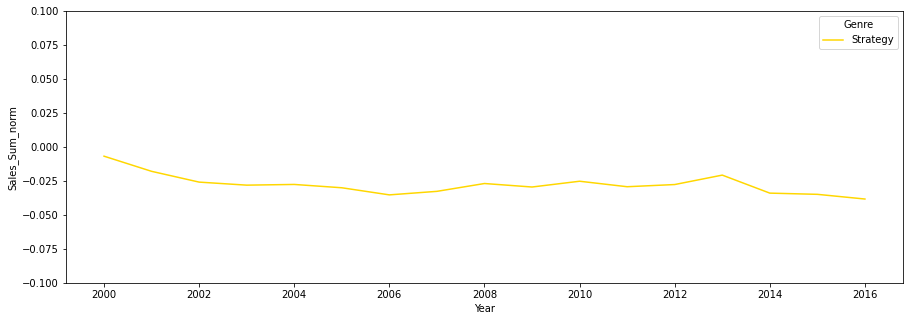

In [60]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=strategy, err_style=None, palette= 'prism');

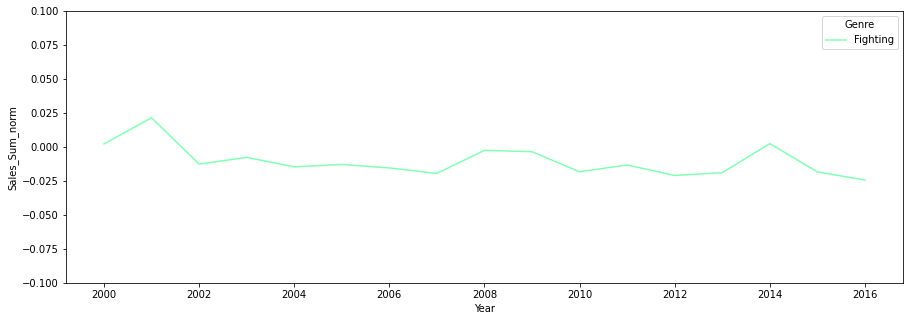

In [61]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=fighting, err_style=None, palette= 'rainbow');

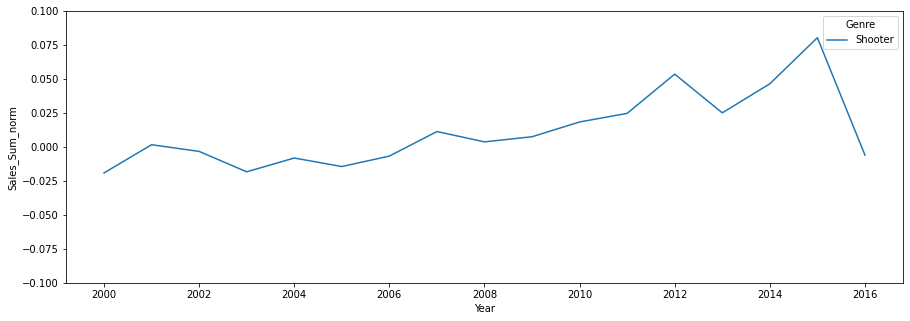

In [62]:
plt.figure(figsize = (15,5))
plt.ylim([-0.1,0.1])
sns.lineplot(x='Year', y='Sales_Sum_norm', hue='Genre', data=shooter, err_style=None);

In [63]:
# NA_Sales에 따른 분석

#필요한 데이터만 추출
y_g_NA = final_year[['Year','Genre', 'NA_Sales']]

y_g_NA.head()

,Year,Genre,NA_Sales
1,2008,Action,0.04
2,2009,Action,0.17
3,2010,Adventure,0.00
4,2010,Misc,0.04
5,2010,Platform,0.12


In [64]:
# 정규분포를 이용하여 표준화

norm_y_g_NA = (y_g_NA['NA_Sales'] - y_g_NA['NA_Sales'].mean())/y_g_NA['NA_Sales'].std()
norm_y_g_NA = pd.DataFrame(norm_y_g_NA)

norm_y_g_NA.rename(columns = {'NA_Sales' : 'NA_Sales_norm'}, inplace = True)
norm_y_g_NA.head()

,NA_Sales_norm
1,-0.274332
2,-0.116312
3,-0.322954
4,-0.274332
5,-0.177089


In [65]:
y_g_NA_real = pd.concat([y_g_NA, norm_y_g_NA], axis = 1)

y_g_NA_real.head()

,Year,Genre,NA_Sales,NA_Sales_norm
1,2008,Action,0.04,-0.274332
2,2009,Action,0.17,-0.116312
3,2010,Adventure,0.00,-0.322954
4,2010,Misc,0.04,-0.274332
5,2010,Platform,0.12,-0.177089


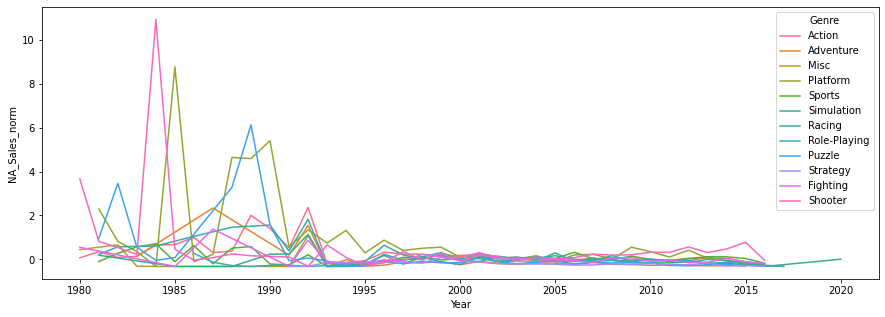

In [66]:
plt.figure(figsize = (15,5))
sns.lineplot(x='Year', y='NA_Sales_norm', hue='Genre', data=y_g_NA_real, err_style = None);

In [67]:
# Year 컬럼에 2000년도 미만 셀이 있는 행은 다 제거 (조건식 이용)
indexNames = y_g_NA_real[(y_g_NA_real['Year'] < 2000)].index
y_g_NA_real.drop(indexNames, inplace=True)

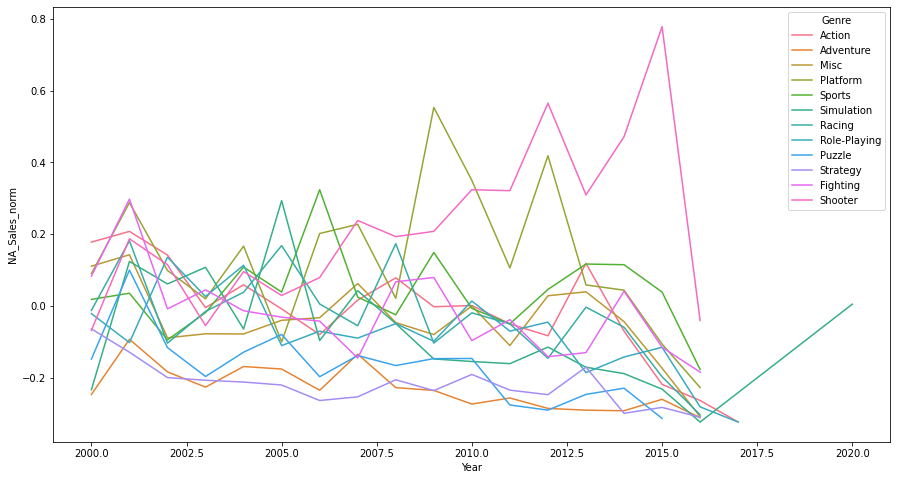

In [68]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='NA_Sales_norm', hue='Genre', data=y_g_NA_real, err_style = None);

In [69]:
# EU_Sales에 따른 분석

#필요한 데이터만 추출
y_g_EU = final_year[['Year','Genre', 'EU_Sales']]

y_g_EU.head()

,Year,Genre,EU_Sales
1,2008,Action,0.00
2,2009,Action,0.00
3,2010,Adventure,0.00
4,2010,Misc,0.00
5,2010,Platform,0.09


In [70]:
# 정규분포를 이용하여 표준화

norm_y_g_EU = (y_g_EU['EU_Sales'] - y_g_EU['EU_Sales'].mean())/y_g_EU['EU_Sales'].std()
norm_y_g_EU = pd.DataFrame(norm_y_g_EU)

norm_y_g_EU.rename(columns = {'EU_Sales' : 'EU_Sales_norm'}, inplace = True)
norm_y_g_EU.head()

,EU_Sales_norm
1,-0.017161
2,-0.017161
3,-0.017161
4,-0.017161
5,-0.011454


In [71]:
y_g_EU_real = pd.concat([y_g_EU, norm_y_g_EU], axis = 1)

y_g_EU_real.head()

,Year,Genre,EU_Sales,EU_Sales_norm
1,2008,Action,0.00,-0.017161
2,2009,Action,0.00,-0.017161
3,2010,Adventure,0.00,-0.017161
4,2010,Misc,0.00,-0.017161
5,2010,Platform,0.09,-0.011454


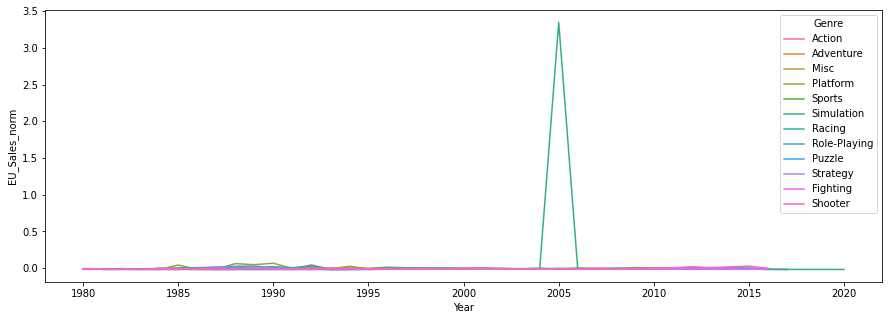

In [72]:
plt.figure(figsize = (15,5))
sns.lineplot(x='Year', y='EU_Sales_norm', hue='Genre', data=y_g_EU_real, err_style = None);

# EU에서 2005년에 Simulation이 갑자기 엄청난 인기가 있었음을 알 수 있다!

In [73]:
# Year 컬럼에 2000년도 미만 셀이 있는 행은 다 제거 (조건식 이용)
indexNames = y_g_EU_real[(y_g_EU_real['Year'] < 2000)].index
y_g_EU_real.drop(indexNames, inplace=True)

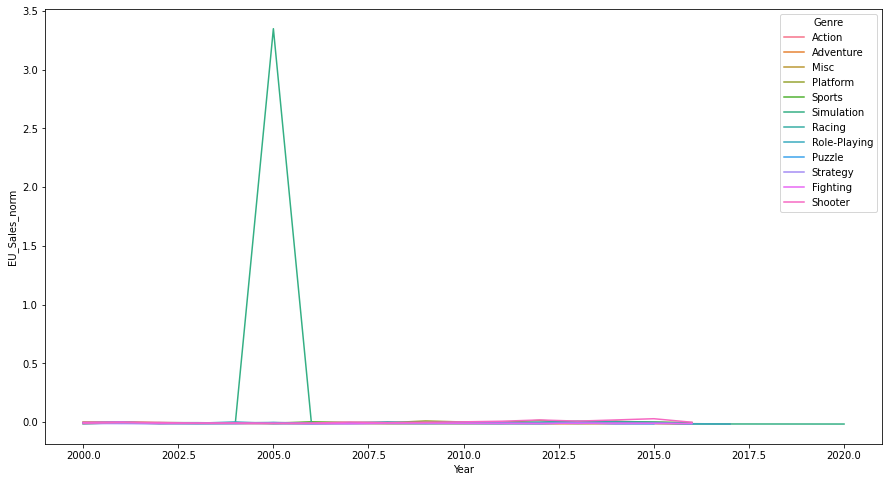

In [74]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='EU_Sales_norm', hue='Genre', data=y_g_EU_real, err_style = None);

In [75]:
# JP_Sales에 따른 분석

#필요한 데이터만 추출
y_g_JP = final_year[['Year','Genre', 'JP_Sales']]

y_g_JP.head()

,Year,Genre,JP_Sales
1,2008,Action,0.00
2,2009,Action,0.00
3,2010,Adventure,0.02
4,2010,Misc,0.00
5,2010,Platform,0.00


In [76]:
# 정규분포를 이용하여 표준화

norm_y_g_JP = (y_g_JP['JP_Sales'] - y_g_JP['JP_Sales'].mean())/y_g_JP['JP_Sales'].std()
norm_y_g_JP = pd.DataFrame(norm_y_g_JP)

norm_y_g_JP.rename(columns = {'JP_Sales' : 'JP_Sales_norm'}, inplace = True)
norm_y_g_JP.head()

,JP_Sales_norm
1,-0.252700
2,-0.252700
3,-0.188603
4,-0.252700
5,-0.252700


In [77]:
y_g_JP_real = pd.concat([y_g_JP, norm_y_g_JP], axis = 1)

y_g_JP_real.head()

,Year,Genre,JP_Sales,JP_Sales_norm
1,2008,Action,0.00,-0.252700
2,2009,Action,0.00,-0.252700
3,2010,Adventure,0.02,-0.188603
4,2010,Misc,0.00,-0.252700
5,2010,Platform,0.00,-0.252700


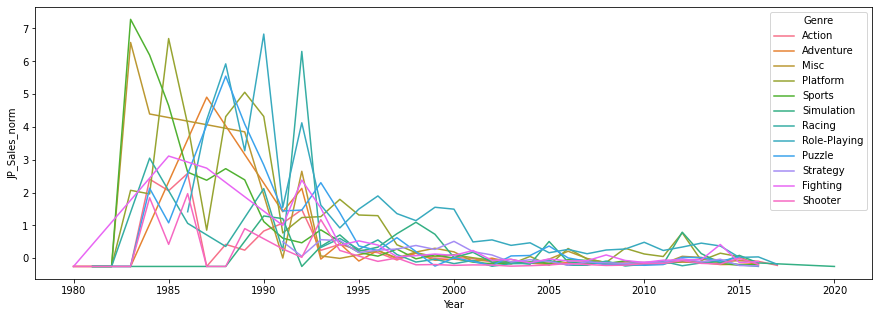

In [78]:
plt.figure(figsize = (15,5))
sns.lineplot(x='Year', y='JP_Sales_norm', hue='Genre', data=y_g_JP_real, err_style = None);

In [79]:
# Year 컬럼에 2000년도 미만 셀이 있는 행은 다 제거 (조건식 이용)
indexNames = y_g_JP_real[(y_g_JP_real['Year'] < 2000)].index
y_g_JP_real.drop(indexNames, inplace=True)

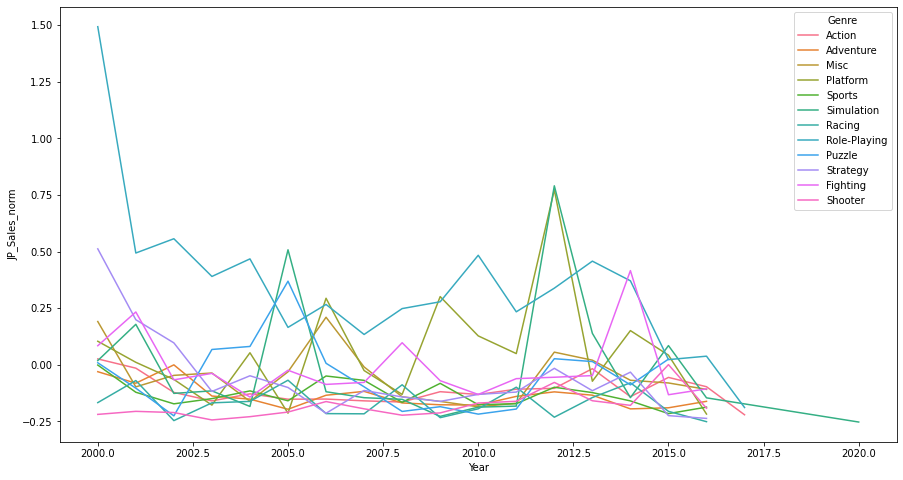

In [80]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='JP_Sales_norm', hue='Genre', data=y_g_JP_real, err_style = None);

In [81]:
# Other_Sales에 따른 분석

#필요한 데이터만 추출
y_g_Other = final_year[['Year','Genre', 'Other_Sales']]

y_g_Other.head()

,Year,Genre,Other_Sales
1,2008,Action,0.00
2,2009,Action,0.01
3,2010,Adventure,0.00
4,2010,Misc,0.00
5,2010,Platform,0.04


In [82]:
# 정규분포를 이용하여 표준화

norm_y_g_Other = (y_g_Other['Other_Sales'] - y_g_Other['Other_Sales'].mean())/y_g_Other['Other_Sales'].std()
norm_y_g_Other = pd.DataFrame(norm_y_g_Other)

norm_y_g_Other.rename(columns = {'Other_Sales' : 'Other_Sales_norm'}, inplace = True)
norm_y_g_Other.head()

,Other_Sales_norm
1,-0.254453
2,-0.201867
3,-0.254453
4,-0.254453
5,-0.044110


In [83]:
y_g_Other_real = pd.concat([y_g_Other, norm_y_g_Other], axis = 1)

y_g_Other_real.head()

,Year,Genre,Other_Sales,Other_Sales_norm
1,2008,Action,0.00,-0.254453
2,2009,Action,0.01,-0.201867
3,2010,Adventure,0.00,-0.254453
4,2010,Misc,0.00,-0.254453
5,2010,Platform,0.04,-0.044110


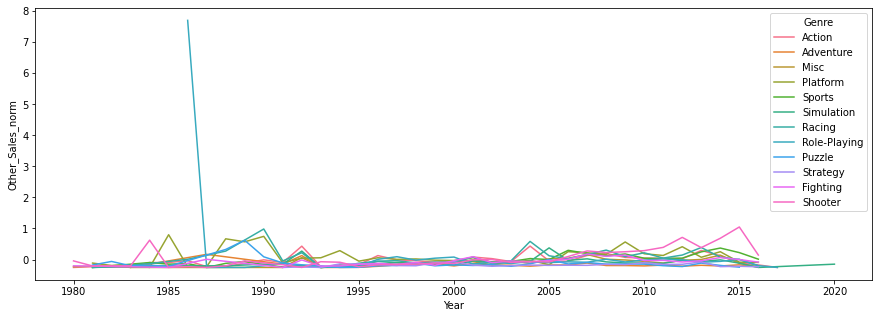

In [84]:
plt.figure(figsize = (15,5))
sns.lineplot(x='Year', y='Other_Sales_norm', hue='Genre', data=y_g_Other_real, err_style = None);

#다른 나라와 달리 Role-Playing이 굉장히 유행 했었던 적이 있었다.

In [85]:
# Year 컬럼에 2000년도 미만 셀이 있는 행은 다 제거 (조건식 이용)
indexNames = y_g_Other_real[(y_g_Other_real['Year'] < 2000)].index
y_g_Other_real.drop(indexNames, inplace=True)

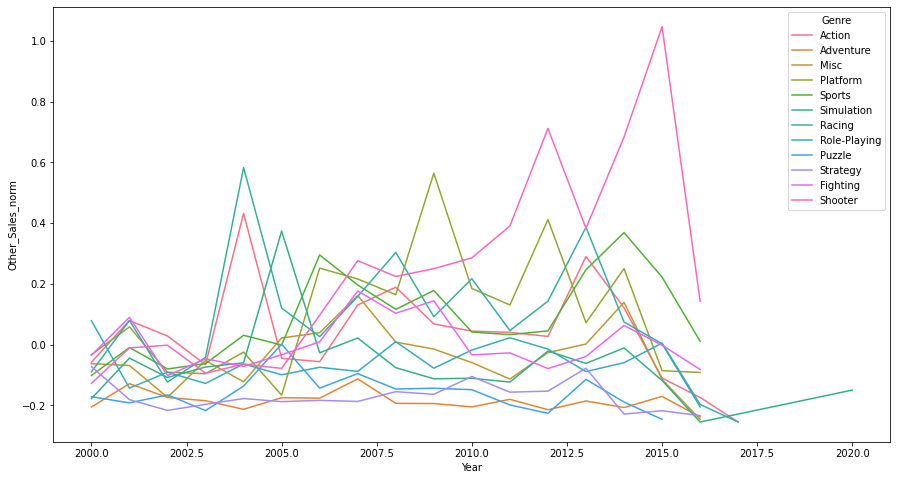

In [86]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year', y='Other_Sales_norm', hue='Genre', data=y_g_Other_real, err_style = None);

## 3. 결론

1. 지역에 따른 장르 선호도

북미지역 : Action > Sports > Shooter

유럽지역 : Action > Sports > Shooter

일본지역 : Role-playing이 다른 장르에 비해 압도적으로 높다. 하지만 차이는 크지만 그 후의 순위는 다른 지역과 마찬가지로 Action > Sports 이다.

기타지역 : Action > Sports > Shooter

하위 3가지 장르도 마찬가지로 다른 지역들과 비슷하다 (Adventure, Puzzle, Strategy)

전체적으로 Action 장르가 가장 인기가 많다고 판단할 수 있다.


2. 연도별 게임 트랜드

그래프를 살펴보면 전체적으로 모든 데이터가 1995년~2000년을 기점으로 매출량 자체가 크게 감소함을 확인할 수  있다.

게임 시장이 전체적으로 크게 감소함을 알 수 있다.

2005년에 simulation 장르가 폭발적으로 증가하였는데 이는 유럽지역에서 한번 크게 유행했음을 알 수 있다. 하지만 그 이후로는 미미한 데이터 수치가 나타났다.

2000년대 이후로는 모든 게임 장르 매출량이 서로 크게 차이가 나지 않는다. 게다가 점점 감소추세를 나타내고 있다.

1번 분석에서 Action, Sports, Shooter 장르가 이미 매출량의 대부분을 차지하고 있음을 알 수 있었는데, 이는 이 세 장르의 새로운 게임의 진입장벽이 꽤 높다는 것 을 의미한다. 

Racing 장르로 새로운 게임을 출시하면 좋을 것 같다고 생각한다. 왜냐하면 이이 장르는 북미지역, 기타지역에서 심지어 상승하는 추세가 보인다. Racing 장르는 모든 지역에서 적지 않은 매출량을 나타낸다. 이는 수요가 너무 적지 않지만 새로운 게임의 진입장벽이 그렇게 높지 않다고 생각한다.
이번 기획을 통해 사람들의 이목을 끌 만한 재미있는 Racing게임을 출시한다면 글로벌 게임 시장에서도 충분히 인기를 끌 수 있을것이라고 판단했다.